# Schelling's Segregation Model 
# with Matplotlib Inline Visualisation for Jupyter Notebooks

When using Matplotlib for interactive visualisations in this form, it is important to bear in mind that almost all errors generated by functions called by the interactive interface are masked / hidden, i.e. they will interupt the execution of the calling function but no error message will be visible. This makes debugging extremely difficult! It is thus crucial to find a way to avoid this during development. One possibility to achieve this is to "layer" the development, i.e. to explicitly call the step() and draw() function from the command line (Jupyter cell) first without the interactive interface (This will leave error messages visible). Only in the final step, when the update functions work, should the interactive interface be wrapped around everything.  

## Set up matplotlib interface

The maplotlib backend ipympl keeps the visualisation within the notebook and should (!!) work universally (including in browser-based Jupyter servers).

In [19]:
%matplotlib ipympl

RuntimeError: 'ipympl is not a recognised GUI loop or backend name

## General Imports

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.cm as cm
from matplotlib.widgets import Button, Slider

import random as RD


## The actual simulation code

In [ ]:
def simulation(density):
    global ani, config, fig, ax, bnext, bstart, bstop, binit, empty, unhappiness, avg_similarity, mat, time, threshold

    def advance(d):
        global mat, config, plt, time, threshold, fig
        time += 1
        step(threshold)
        mat.set_data(config)
        plt.title('t = ' + str(time))    
        fig.canvas.draw_idle()

    def stopAnim(d):
        global ani
        ani.pause()

    def startAnim(d):
        global ani
        ani.resume()

    def initAnim(d):
        global mat, config, plt, time, fig
        time = 0
        init(density)
        mat.set_data(config)
        plt.title('t = ' + str(time))    
        fig.canvas.draw_idle()
    
    def updateThreshold(val):
        global threshold
        threshold = sthresh.val

    RD.seed()
    plt.close('all')
    fig, ax = plt.subplots()
    ax.axis('off')
    plt.title("Shelling's Segregation Model")

    # Adjust layout to make space for widgets
    plt.subplots_adjust(bottom=0.25, right=0.8)

    # Create slider
    axthresh = plt.axes([0.175, 0.1, 0.65, 0.03])  # Adjusted position
    sthresh = Slider(axthresh, 'Threshold', 0.0, 1.0, valinit=0.7)
    sthresh.on_changed(updateThreshold)

    # Create buttons
    axnext = plt.axes([0.85, 0.15, 0.1, 0.075])
    axstart = plt.axes([0.85, 0.25, 0.1, 0.075])
    axstop = plt.axes([0.85, 0.35, 0.1, 0.075])
    axinit = plt.axes([0.85, 0.45, 0.1, 0.075])
    bnext = Button(axnext, 'Next')
    bnext.on_clicked(advance)
    bstart = Button(axstart, 'Resume')
    bstart.on_clicked(startAnim)
    bstop = Button(axstop, 'Stop')
    bstop.on_clicked(stopAnim)
    binit = Button(axinit, 'Init')
    binit.on_clicked(initAnim)

    # Initialize grid and plot
    config = np.zeros([height, width])
    mat = ax.matshow(config, cmap=cm.seismic, vmin=-1, vmax=1)
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.grid(True, color='black', linewidth=0.5)

    # Initialize animation
    initAnim(None)
    ani = anim.FuncAnimation(fig, advance, frames=None, cache_frame_data=False, interval=60, repeat=False)
print("test sim")

test sim


### Define the initialisation of the state

In [21]:
def init(density):
    global config, empty, agents, unhappiness, avg_similarity, speed
    global unhappiness, avg_similarity
    speed = 1.0
    empty = [(0,1),(1,0)] # could set this to create desired array size
    agents= [(0,1), (1,0)] # grid of n*m
    unhappiness= []
    avg_similarity= []
    config = np.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < density:
                agents.append((y, x))
                if RD.random() < 0.5:
                    config[y, x] = 1
                else:
                    config[y, x] = -1
            else:
                config[y,x] = 0
                empty.append((y, x))
    print(empty)


### Define the state transition rules

In [20]:
def step(threshold):
    global config, agents, empty, unhappiness, avg_similarity
    
    unhappy = 0 # lower, less likely to move
    similarity = 0.0 # 

    height, width = config.shape

    sequence = list(range(len(agents)))
    print("test")
    print("test", agents, empty, unhappiness, avg_similarity)
    RD.shuffle(sequence)
    print(empty)
    for i in sequence:
        x,y = agent[i]
        similar = 0
        neighbors = len(agents)
        
        
        # if lower than threshold, move to empty space
        
    unhappiness = unhappiness+[] # append current value for later plotting
    avg_similarity = avg_similarity+[0] # append current value for later plotting

# Auxiliary Functions for Plotting Results

In [ ]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

import numpy as np
from scipy import stats 

In [ ]:
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
def plot_schelling():
    global unhappiness, avg_similarity
    n = len(unhappiness)
    trace1 = go.Scatter(
        x=list(range(n)), 
        y=unhappiness, 
        mode = 'lines+markers',
        name='average unhappiness'
    )
    trace2 = go.Scatter(
        x=list(range(n)), 
        y=avg_similarity, 
        mode = 'lines+markers',
        name='average similarity'
    )
    data = [trace1, trace2]
    return iplot(data)


### Set the simulation parameters

In [ ]:
width = 50
height = 50

density =0.8
threshold =0.7

# Testing

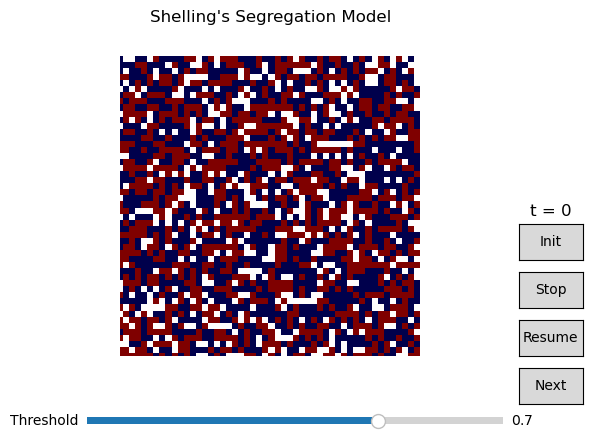

In [ ]:
simulation(density)

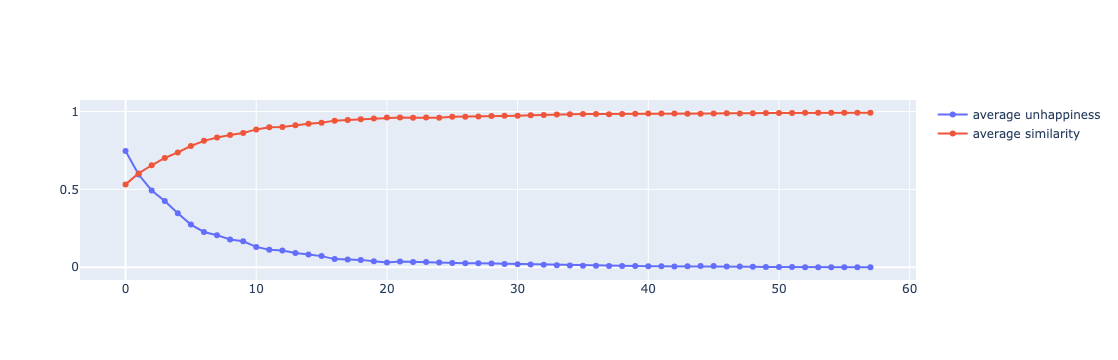

In [ ]:
plot_schelling()